## Libraries

In [101]:
%load_ext autoreload
%autoreload 2

import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn
import optimizer_Factory as of

import Data.genData as genData

import analysis as an

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

<Figure size 640x480 with 0 Axes>

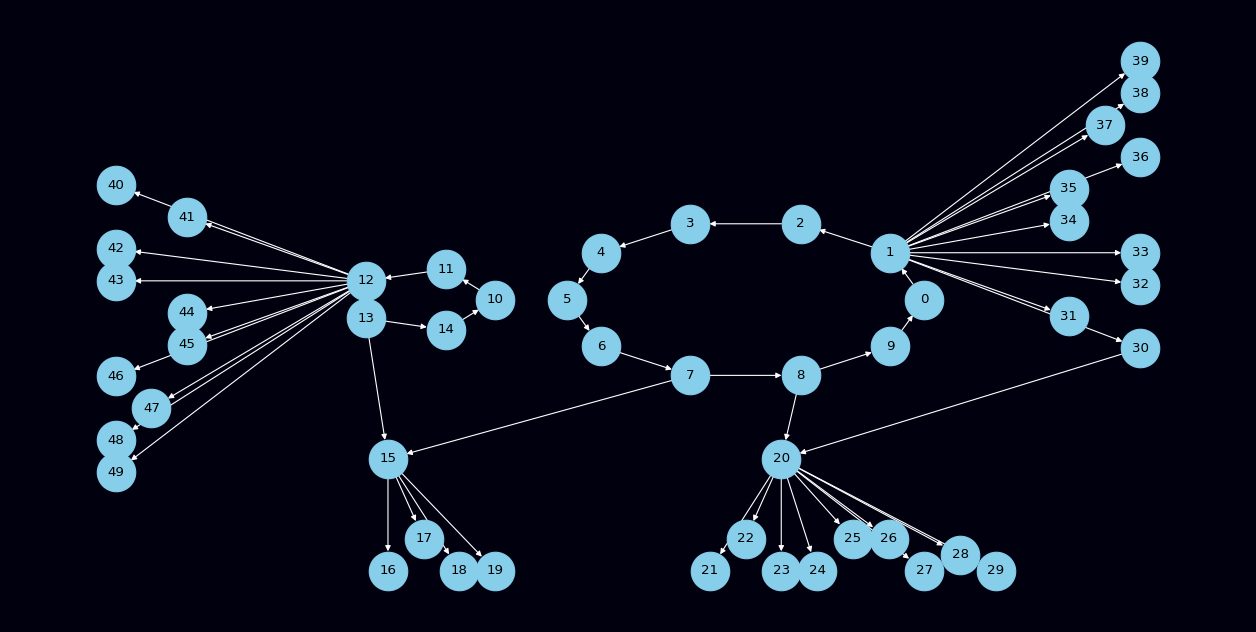

<Figure size 640x480 with 0 Axes>

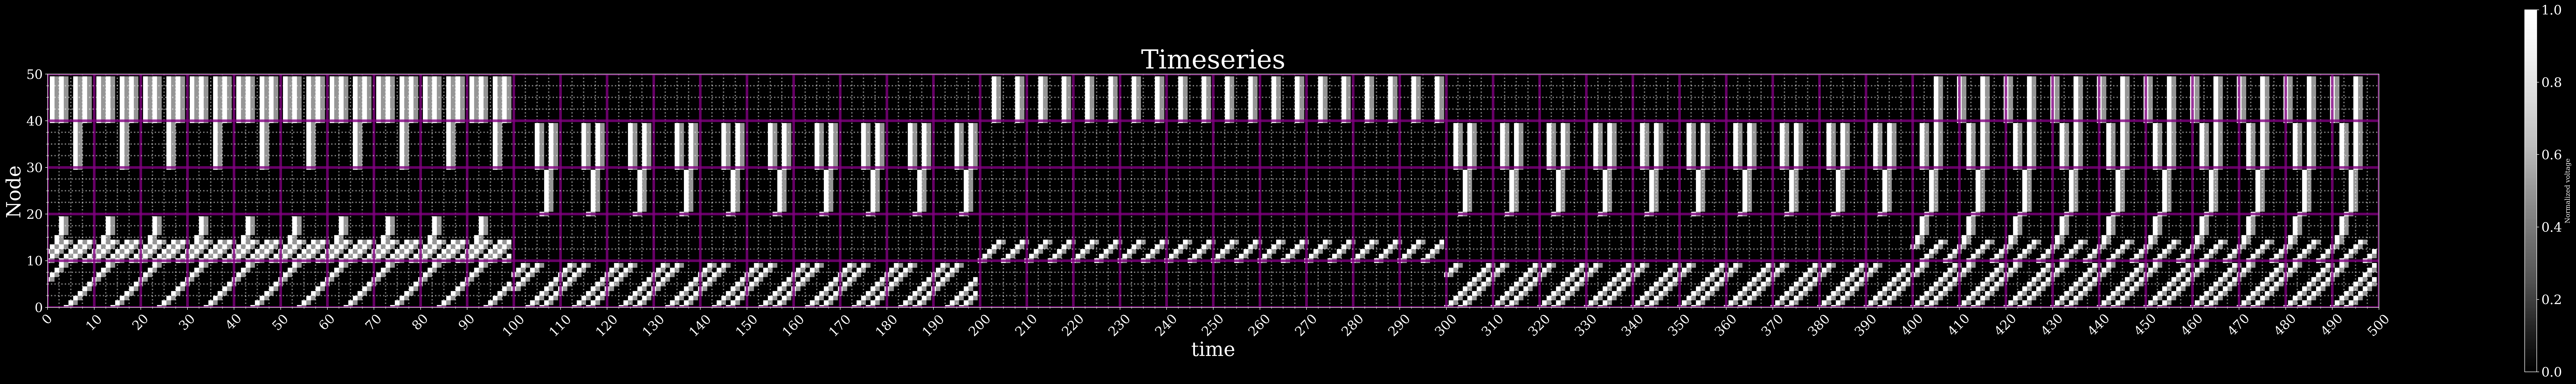

In [95]:
timeseries, adj_GT, pos  = genData.genData()

In [96]:
cfg = OmegaConf.load("config.yaml")
print(OmegaConf.to_yaml(cfg))
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)


seed: 42
optimize:
  optimizer: Adam
  lr: 0.001
train:
  epochs: 100
  batch_size: 32
dataset:
  path: MNIST
  test_size: 0.1
  train_size: 0.8
  val_size: 0.1
  num_workers: 2
loss: custom



## Experiment Classic Method

In [97]:
window = 4
train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'cross_correlation',threshold =0.3, window = window, overlap = 0.5)

X_train shape:  (50, 400)
X_val shape:  (50, 50)
X_test shape:  (50, 50)


Using device: cuda
epoch: 10 	 training loss: 509.02858298165455 	 validation loss: 658.1102294921875 	 accuracy : 1.0
epoch: 20 	 training loss: 474.50956181117465 	 validation loss: 614.4808349609375 	 accuracy : 1.0
epoch: 30 	 training loss: 443.518801007952 	 validation loss: 574.4625244140625 	 accuracy : 1.0
epoch: 40 	 training loss: 414.95962197440014 	 validation loss: 537.527099609375 	 accuracy : 1.0
epoch: 50 	 training loss: 388.97255270821705 	 validation loss: 503.96417236328125 	 accuracy : 1.0
epoch: 60 	 training loss: 365.68534415108815 	 validation loss: 473.7066955566406 	 accuracy : 1.0
epoch: 70 	 training loss: 344.8966702052525 	 validation loss: 446.6924133300781 	 accuracy : 1.0
epoch: 80 	 training loss: 326.539979662214 	 validation loss: 422.5495910644531 	 accuracy : 1.0
epoch: 90 	 training loss: 310.303829738072 	 validation loss: 401.1702880859375 	 accuracy : 1.0
epoch: 100 	 training loss: 296.15488869803295 	 validation loss: 382.47772216796875 	 a

<Figure size 640x480 with 0 Axes>

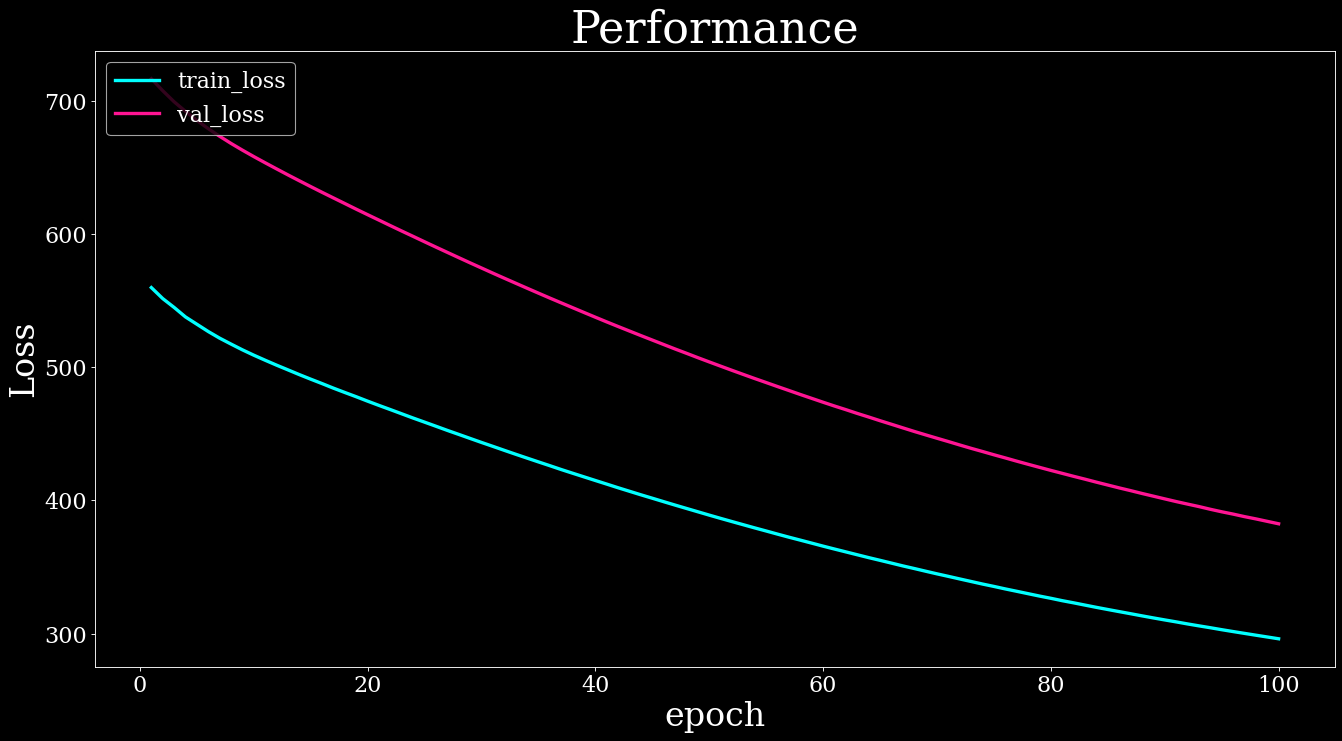

In [103]:

modelGNN = models.GNN(window, 1, 32)

modelGNN, train_losses, val_losses, accuracy_list  = train.train(modelGNN, train_loader, val_loader, 'GNNSimple')

adj2 shape:  (50, 50)
sparcity Real Graph:  0.02122448979591837  sparcity Predicted Graph:  0.1489795918367347
Number of well predicted edges:  35 Number of wrong predicted edges:  330 Number of edges in real graph:  52 Number of edges in predicted graph:  365


<Figure size 640x480 with 0 Axes>

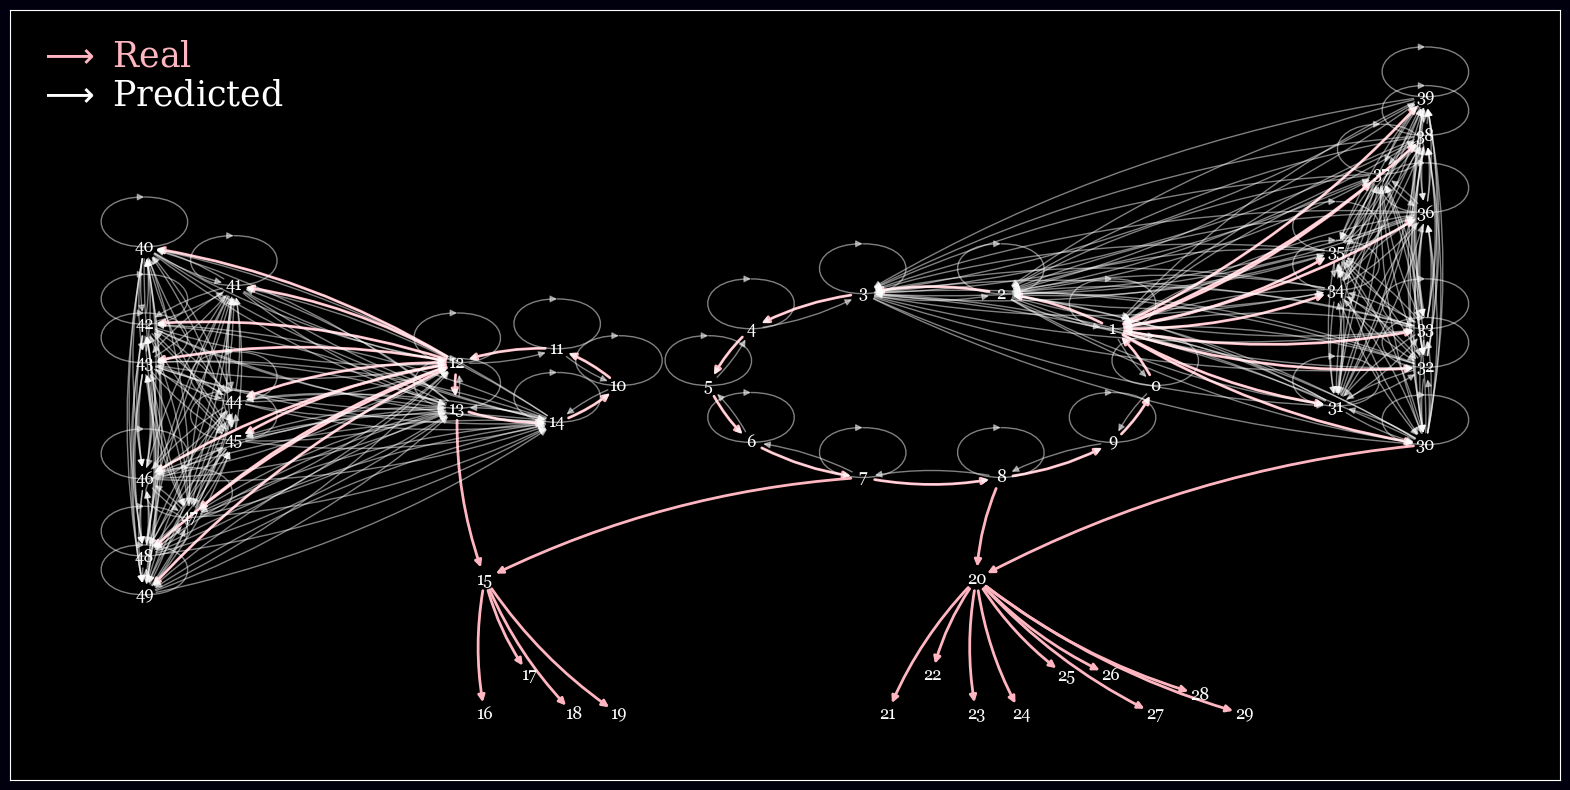

In [107]:
an.compare_Graphs(adj_GT , modelGNN.get_adjMat().clone().cpu().detach().numpy(), threshold=0.3, pos = pos)

## Experiment Custom GAT

In [121]:
%load_ext autoreload
%autoreload 2

import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn
import optimizer_Factory as of

from ModelGAT import GATConv

import Data.genData as genData

import analysis as an

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
window = 4
train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'fully_connected', window = window, overlap = 0.5)

X_train shape:  (50, 400)
X_val shape:  (50, 50)
X_test shape:  (50, 50)


Using device: cuda
epoch: 10 	 training loss: 712.6746281215122 	 validation loss: 1297.8902587890625 	 accuracy : 1.0
epoch: 20 	 training loss: 629.7015053885324 	 validation loss: 1081.3916015625 	 accuracy : 1.0
epoch: 30 	 training loss: 562.451666695731 	 validation loss: 900.2969360351562 	 accuracy : 1.0
epoch: 40 	 training loss: 508.3566447666713 	 validation loss: 755.3255004882812 	 accuracy : 1.0
epoch: 50 	 training loss: 464.1003723144531 	 validation loss: 647.0325317382812 	 accuracy : 1.0
epoch: 60 	 training loss: 425.6491503034319 	 validation loss: 563.7052001953125 	 accuracy : 1.0
epoch: 70 	 training loss: 393.1760733468192 	 validation loss: 503.8125305175781 	 accuracy : 1.0
epoch: 80 	 training loss: 366.9874823434012 	 validation loss: 465.8426513671875 	 accuracy : 1.0
epoch: 90 	 training loss: 342.6324942452567 	 validation loss: 435.5736389160156 	 accuracy : 1.0
epoch: 100 	 training loss: 322.19219643729076 	 validation loss: 421.9375 	 accuracy : 1.0


<Figure size 640x480 with 0 Axes>

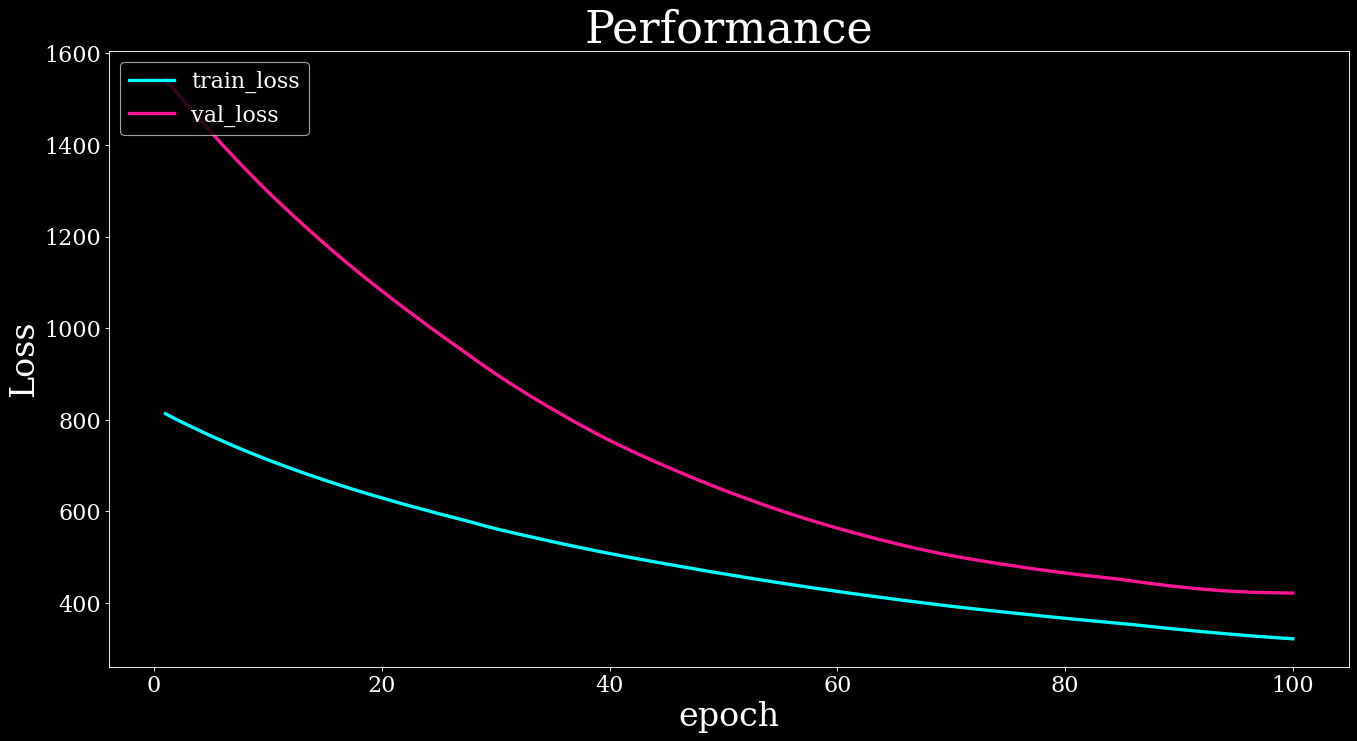

In [110]:
modelGATcustom = models.GATCustom(window, 1)

modelGATcustom, train_losses, val_losses, accuracy_list  = train.train(modelGATcustom, train_loader, val_loader, 'GATCustom')

torch.Size([50, 50])
adj2 shape:  (50, 50)
sparcity Real Graph:  0.02122448979591837  sparcity Predicted Graph:  1.0204081632653061
Number of well predicted edges:  52 Number of wrong predicted edges:  2448 Number of edges in real graph:  52 Number of edges in predicted graph:  2500


<Figure size 640x480 with 0 Axes>

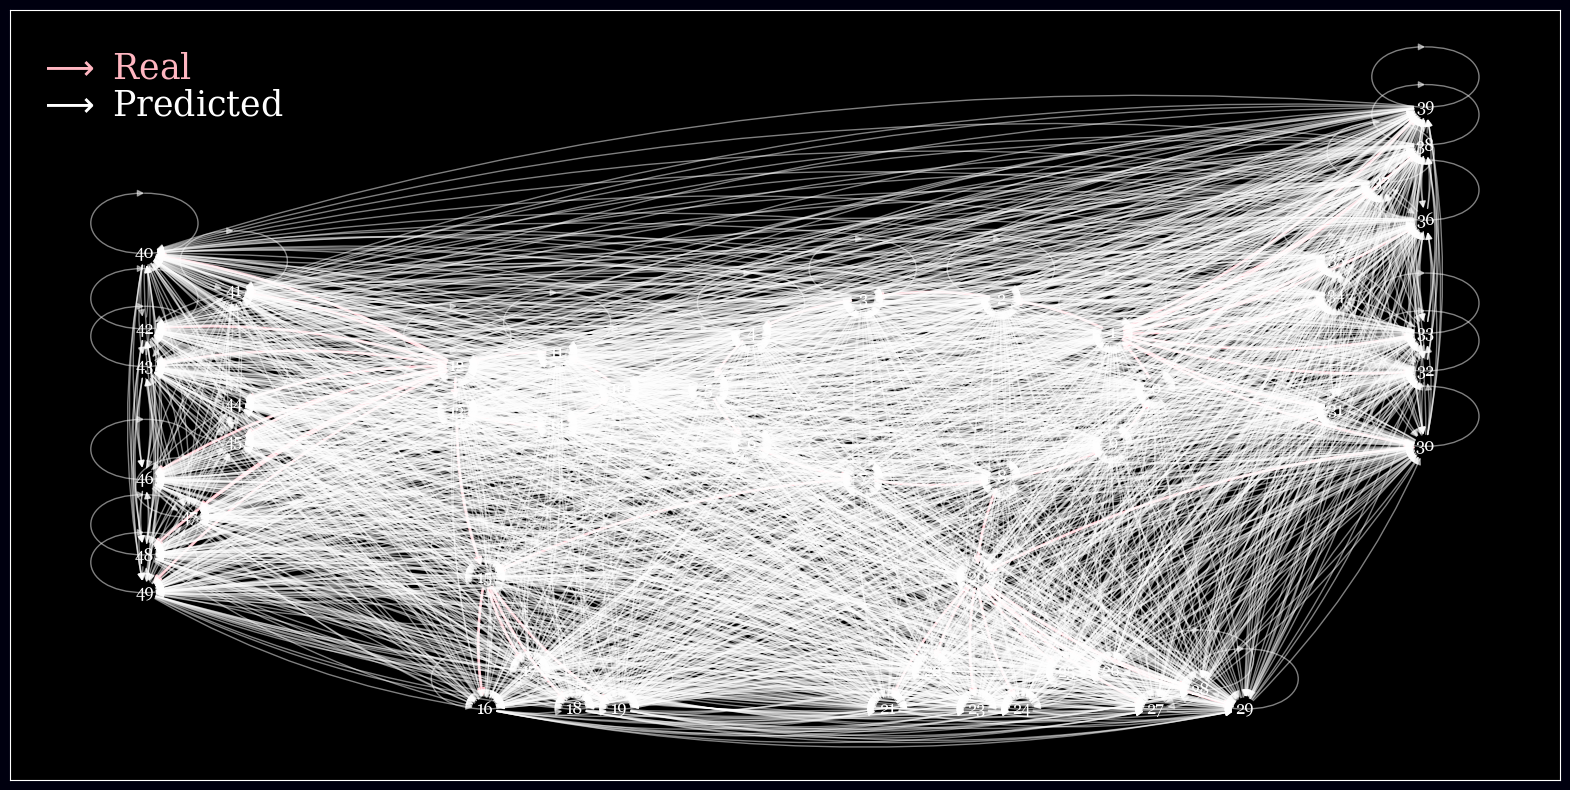

In [115]:
print(modelGATcustom.get_adjMat().shape)
an.compare_Graphs(adj_GT , modelGATcustom.get_adjMat().clone().cpu().detach().numpy(), threshold=0.01, pos = pos)

## Experiment Learnable Adjacency Matrix

Using device: cuda
epoch: 10 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 20 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 30 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 40 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 50 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 60 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 70 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 80 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 90 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0
epoch: 100 	 training loss: nan 	 validation loss: nan 	 accuracy : 1.0


<Figure size 640x480 with 0 Axes>

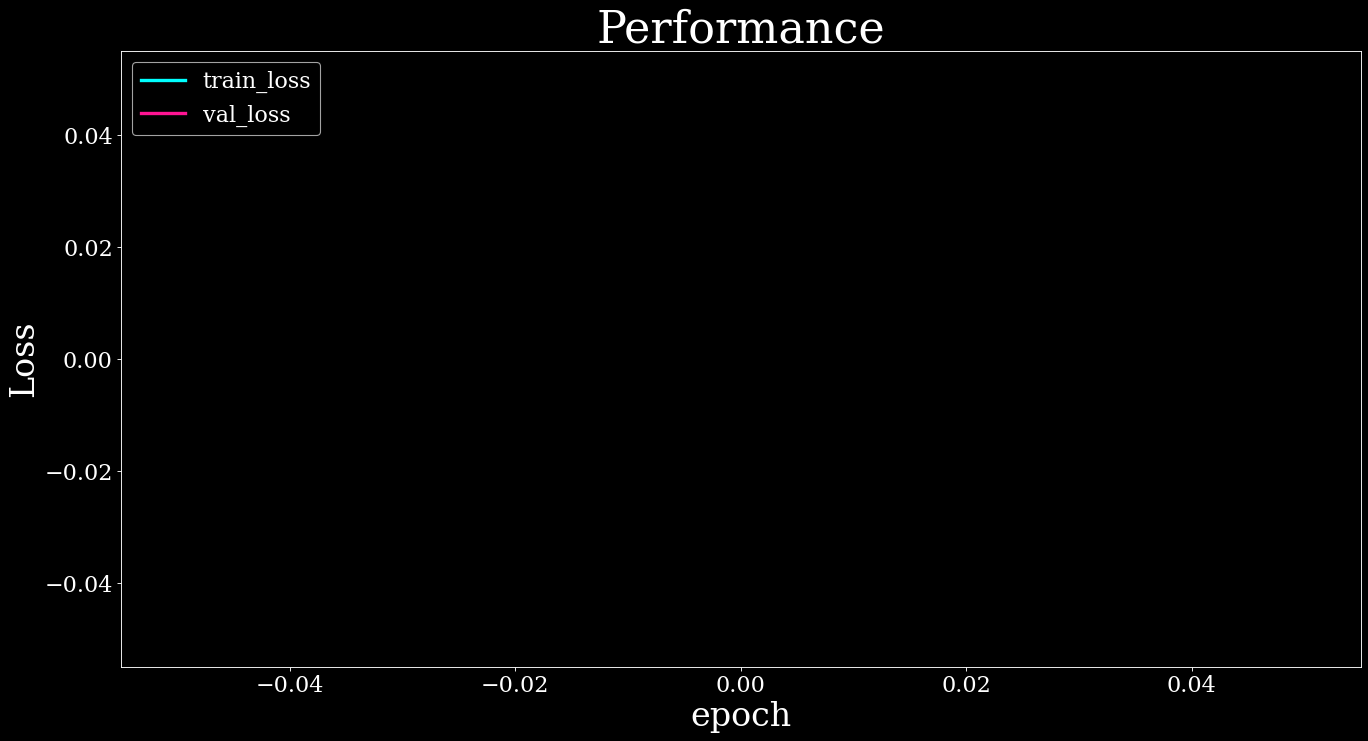

In [122]:
modelGCNlearnable = models.GCNlearnable(window, 1, n_nodes=50)

modelGCNlearnable, train_losses, val_losses, accuracy_list  = train.train(modelGCNlearnable, train_loader, val_loader, 'GCNlearnable')

torch.Size([50, 50])
adj2 shape:  (50, 50)
sparcity Real Graph:  0.02122448979591837  sparcity Predicted Graph:  1.0204081632653061
Number of well predicted edges:  52 Number of wrong predicted edges:  2448 Number of edges in real graph:  52 Number of edges in predicted graph:  2500


<Figure size 640x480 with 0 Axes>

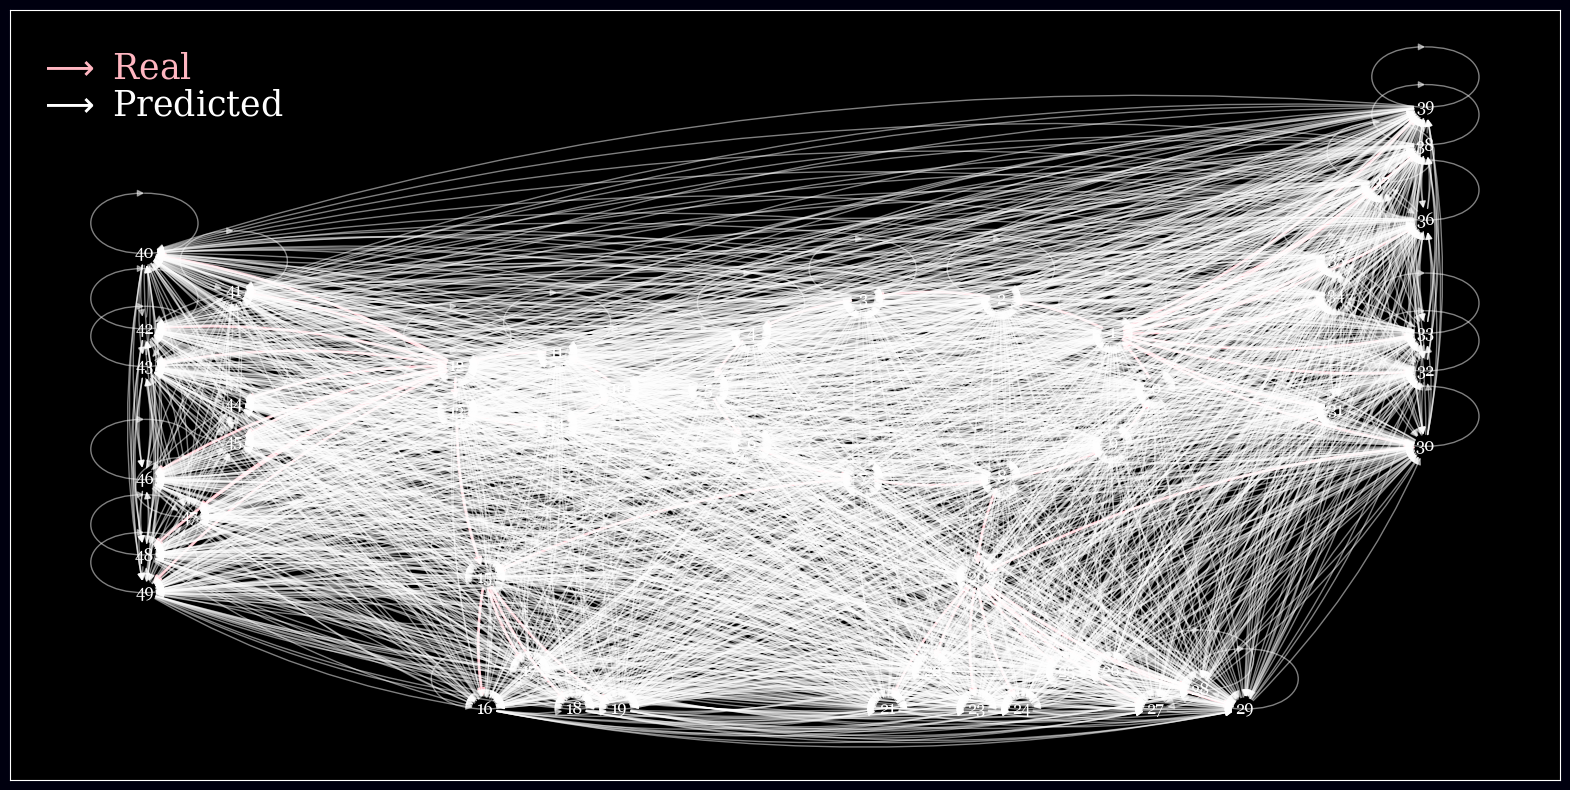

In [126]:
print(modelGCNlearnable.get_adjMat().shape)
an.compare_Graphs(adj_GT , modelGCNlearnable.get_adjMat().clone().cpu().detach().numpy(), threshold=0.5, pos = pos)

## Tests

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
testCase = train_loader.dataset[0].to(device)

modelGATGCN(testCase)

torch.Size([50, 4])
torch.Size([2, 2450])
torch.Size([50, 4])
torch.Size([2, 2500])
torch.Size([2500, 1])


tensor([[0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.1013],
        [0.0762],
        [0.0821],
        [0.0619],
        [0.1398],
        [0.0762],
        [0.1658],
        [0.0924],
        [0.0821],
        [0.0821],
        [0.0619],
        [0.0619],
        [0.0619],
        [0.0619],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924]], device='cuda:0', grad_fn=<AddBackward0>)

# Calculations debug

In [120]:
aaarep = torch.rand(2,2)
print(aaarep)
aaarep = aaarep.repeat(2,1,1)
print(aaarep)

tensor([[0.9497, 0.8926],
        [0.2663, 0.2835]])
tensor([[[0.9497, 0.8926],
         [0.2663, 0.2835]],

        [[0.9497, 0.8926],
         [0.2663, 0.2835]]])


In [63]:
import torch.nn.functional as F

rand = torch.rand(2, 3, 3)
print(rand)
attention = F.softmax(rand, dim=-1)
print(attention)



tensor([[[0.4377, 0.9194, 0.0340],
         [0.2302, 0.3931, 0.3515],
         [0.9618, 0.7358, 0.8219]],

        [[0.8401, 0.1265, 0.4421],
         [0.5730, 0.6300, 0.7571],
         [0.3010, 0.3492, 0.9184]]])
tensor([[[0.3043, 0.4925, 0.2032],
         [0.3025, 0.3560, 0.3415],
         [0.3749, 0.2991, 0.3260]],

        [[0.4626, 0.2266, 0.3107],
         [0.3067, 0.3247, 0.3687],
         [0.2562, 0.2688, 0.4750]]])


In [82]:
torch.manual_seed(0)
atest = torch.randn(2, 3, 2)
print(atest)

n_batch = 2
n_nodes = 3
n_features = 2

h = atest.view(n_batch * n_nodes, -1)
print(h)

N = n_batch * n_nodes

print("1st repeat")

print(h.repeat(1, N).shape )

#print(atest.repeat(1,1, N) )
print(atest.repeat(1,1, n_nodes).shape )

print("1st repeat 2nd view ")

#print(h.repeat(1, N).view(N * N, -1) )
print(h.repeat(1, N).view(N * N, -1).shape )

#print(atest.repeat(1,1, N).view(n_batch, -1, n_features)[0,:,:] )
print(atest.repeat(1,1, n_nodes).view(n_batch, -1,n_features).shape )

print("2nd repeat")

#print(h.repeat(N, 1) )

print(h.repeat(N, 1).shape )

#print(atest.repeat(1,1, N) )
#print(atest.repeat(1,N, 1) )
print(atest.repeat(1,n_nodes, 1).shape )

print("concat")

a1 = torch.cat([h.repeat(1, N).view(N * N, -1), h.repeat(N, 1)], dim=1)
a2 = torch.cat([atest.repeat(1,1, n_nodes).view(n_batch, -1,n_features), atest.repeat(1,n_nodes, 1)], dim=2)
print(a1.shape)
print(a2.shape)

#print(a1[:10,:])
#print(a2[:,0:10,:])

a1_input = torch.cat([h.repeat(1, N).view(N * N, -1), h.repeat(N, 1)], dim=1).view(N, -1, 2 * 2)
a2_input = torch.cat([atest.repeat(1,1, n_nodes).view(n_batch, -1,n_features), atest.repeat(1,n_nodes, 1)], dim=2).view(n_batch, n_nodes, n_nodes,2 * 2)

print(a1_input.shape)
print(a2_input.shape)

print(a2_input.view(-1 , n_features*2).shape)
#print(a_input.shape)
#print(a_input)

tensor([[[ 1.5410, -0.2934],
         [-2.1788,  0.5684],
         [-1.0845, -1.3986]],

        [[ 0.4033,  0.8380],
         [-0.7193, -0.4033],
         [-0.5966,  0.1820]]])
tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986],
        [ 0.4033,  0.8380],
        [-0.7193, -0.4033],
        [-0.5966,  0.1820]])
1st repeat
torch.Size([6, 12])
torch.Size([2, 3, 6])
1st repeat 2nd view 
torch.Size([36, 2])
torch.Size([2, 9, 2])
2nd repeat
torch.Size([36, 2])
torch.Size([2, 9, 2])
concat
torch.Size([36, 4])
torch.Size([2, 9, 4])
torch.Size([6, 6, 4])
torch.Size([2, 3, 3, 4])
torch.Size([18, 4])
